<a href="https://colab.research.google.com/github/ivanafeldfeber/diplo-datos/blob/main/Mentor%C3%ADa%20-%20TP3%20Introducci%C3%B3n%20al%20Aprendizaje%20Autom%C3%A1tico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico 3 sobre los conceptos de la materia Introducción al Aprendizaje Automático**
Integrantes:

- Susana Araujo
- Ivana Feldfeber
- Tamara Maggioni
 



##**I. Preprocesamiento**

####**Obtención del dataset a trabajar**
Para obtener el dataset con el que vamos a trabajar decidimos clasificar a nuestra muestra entre:
- Mujeres que confirman que sufireron violencia de algún tipo
- Mujeres que no confirman que sufrieron violencia de algún tipo

Nos parece importante aclarar que los algoritmos de clasificación para estos temas tan sensibles tienen que ser muy rigurosos y debemos estar atentos y atentas a los sesgos que provienen de los datos y del equipo que realiza el análisis. No estamos a favor de utilizar algoritmos a nivel gubernamental para esta clasificación, ya que la violencia de género es muy compleja, puede tomar muchas formas y muchos niveles de gravedad, y no podemos caracterizarla del todo en un dataset. Especialmente porque en el dataset solo se escucha la voz de la mujer que sufre violencia y es necesario poder caracterizar mejor aún al agresor y a la situación de violencia para comprender y poder decir si una persona sufrirá o no violencia de género.

Para hacer esta clasificación decidimos dejar afuera todas aquellas variables que utilizamos para construir la variable target de la que hablaremos en el siguiente punto. Por lo tanto las variables que nos quedaron son aquellas vinculadas a información demográfica y sobre la vida de las personas entrevistadas. Para construir este dataset utilizamos la función ```
dataset_especifico()``` a la cual debemos pasarle palabras claves que luego buscará con regex y nos traerá las columnas que tengan esas palabras clave. En nuestro caso le pasamos "info_personal" como palabras claves y nos devuelve todas aquellas variables que tienen que ver con la información personal.



####**Dataset para Problema de Clasificación Binario**
Para la construcción de nuestra variable objetivo hicimos un análisis de aquellas columnas que indicaban si una persona había sufrido violencia o no, sin distinguir por tipo de violencia. Estas columnas en general tenían palabras que hacían alusión a una respuesta positiva:

-Menciona
-Sí
-Algunas veces
-Frecuentemente

La función creada utiliza la función existente .any() devuelve True si cualquier elemento de un iterable es verdadero. Si no, devuelve False.

```
def target_column(row):
  return (row == "Si").any() or \
  (row == "Sí").any() or \
  (row == "Frecuentemente").any() or \
  (row == "Algunas veces").any() or \
  (row == "Menciona").any()
```


Para construir nuestra variable objetivo generamos un nuevo dataset con las columnas indicadoras, llamado ```dataset_indicadores``` recorrimos todo el dataset en busca de estas respuestas, y si en una fila, alguna vez aparecía alguna de estas respuestas, en nuestro target se ponía un True que luego convertimos en 1, sino se ponía un False que luego convertimos a 0.

####**Mezcla Aleatória y División en Train/Test**
Para la división en train y test utilizamos las siguientes líneas de código


```
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)
X_train.shape, X_test.shape
```

Utilizamos el parámetro stratify que hace una división de modo que la proporción de valores en train y test sea la misma que la proporción de valores usados para estratificar el parámetro y de este modo no queden pocos 0 o pocos 1 en train o en test. Dividimos los datos un 80% en train y 20% en test.

##**II. Aplicación de modelos de clasificación**

Partimos de la hipótesis de que ciertos datos demográficos pueden servir para predecir mujeres con potencial de sufrir algún tipo de violencia (económica, sexual, física, psicológica). Las respuestas no serán categorícas, sino probabilísticas, ya que el hecho de que una persona presente ciertas características demográficas asociadas a hechos de violencia no son indicativos excluyentes de que se sufrirá un comportamiento violento. Por ello, creemos que el mejor modelo de clasificación binaria deberá otorgarnos probabilidades y no clasificaciones cerradas. 

Trabajamos con tres modelos distintos: Regresión Logística, Árboles de decisión y Perceptron.



## **Regresión Logística**



Con respecto a la Regresión Logística, trabajamos primero pasandole el modelo sin tunear hiperparámetros para ver cómo resultaba. Luego estuvimos modificando los valores de regularización y de penalidad. Para la penalidad estuvimos combinando L1, L2 y Elastic-net con diferentes valores de C. 

La regularización consiste en aplicar una penalización al aumento de la magnitud de los valores de los parámetros para reducir el sobreajuste. Cuando entrenamos un modelo como la regresión logística, estamos eligiendo parámetros que se ajustan a los datos.

El problema surge cuando tenemos muchos parámetros (muchas variables independientes) pero no demasiados datos. En este caso, el modelo a va a adaptar los valores de los parámetros a sus datos, generando overfitting. 

Para solucionar esto, además de minimizar el error también se minimiza una función que penaliza los valores grandes de los parámetros. Trabajamos con C pasandole diversos valores: 1, 10, 100 y 1.000.000, cuando C es 1 la regularización será mayor y cuando el valor de C tiende a números más grandes, casi no se aplica regularización.

Como podemos ver el mejor parámetro para nuestro caso es cuando C=1.

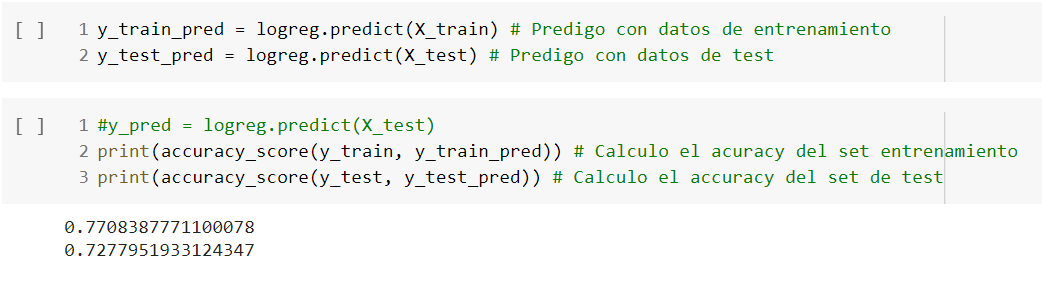



El accuracy luego de correr el GridSearchCV y entrenar al modelo con los mejores valores de hiperparámetros sube tanto para train como para test:
#### **Antes del GridSearchCV:**
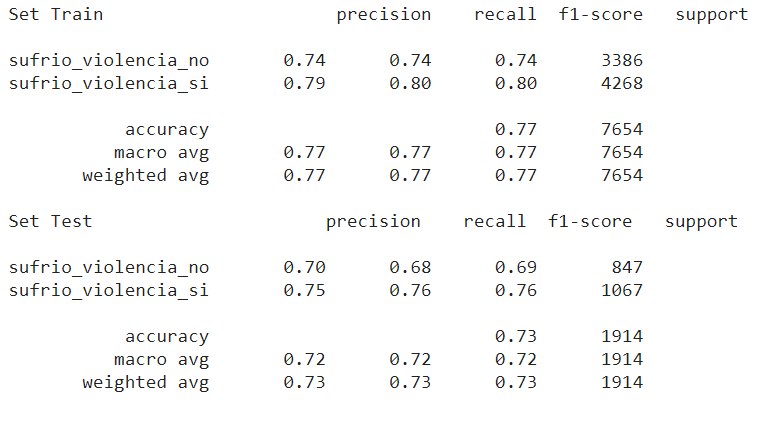


###**Después de GridSearchCV:**

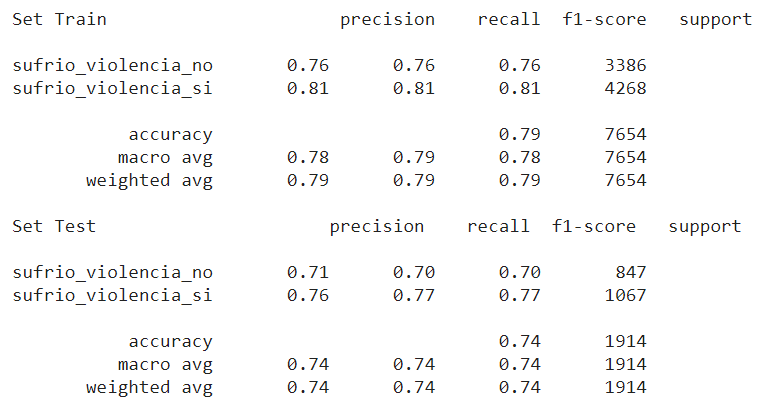

Si comparamos con los valores del modelo anterior, vemos que obtuvimos una mejora. El accuracy para train ascendio de 0.77 a 0.79 y el accuracy para test paso de 0.73 a 0.74. Si bien al aplicar ambos modelos, con y sin tuneo de hiperparametros, la regresion logistica no overfittea, con este ajuste, mejoramos.
Los valores de f1-score tambien mejoraron: pasaron de 0.74 y 0.80 para train a 0.76 y 0.81. Para test, pasaron de 0.69 y 0.76 a 0.70 y 0.77.

A su vez la curva ROC nos muestra una buena performance del modelo

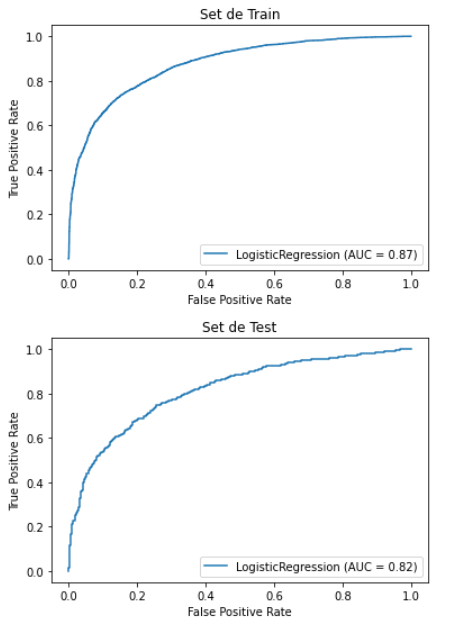


## **Árboles de decisión**

Elegimos utilizar el modelo DecissionTreeClassifier y obtuvimos el siguiente árbol:
[bold text](https:// [link text](https://))
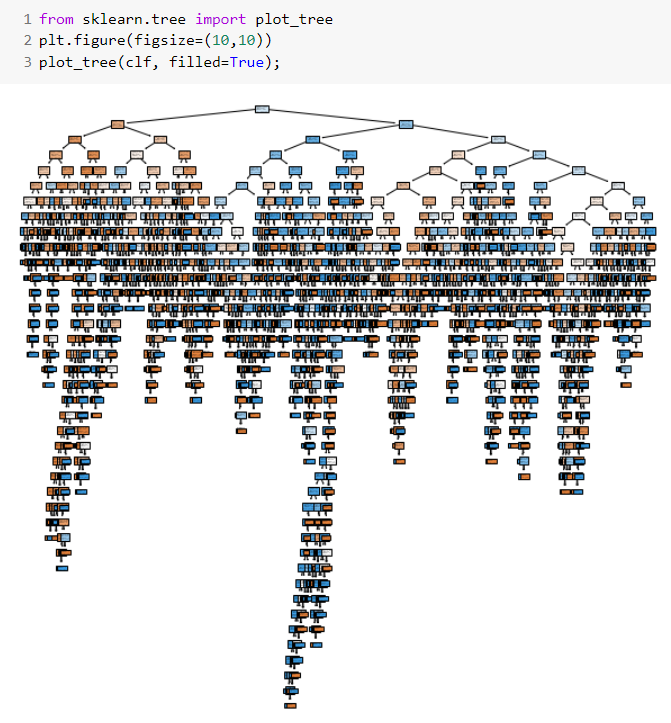



A su vez a través de las métricas y de la curva ROC podemos ver que el modelo está sobreajustando en los datos de entrenamiento y no está prediciendo con éxito en el test. 
Con estos resultados, ya nos damos cuenta que nuestro arbol por default overfittea, ya que el accuracy es 1! Al igual que el resto de las metricas. Es decir, se ajusta con demasiada exactitud a los datos de entrenamiento y predice bastante mal los datos en test. En test, el accuracy desciende a 0.67 y el f1-score a 0.62 y 0.71. 

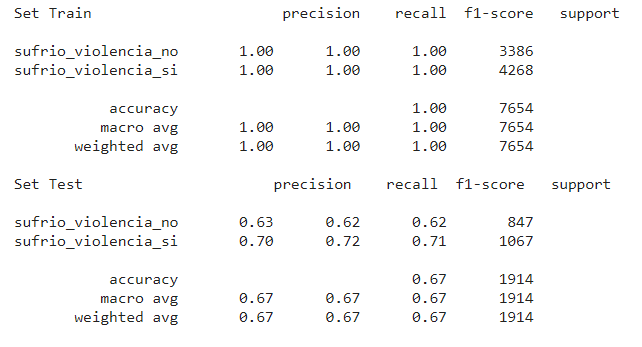

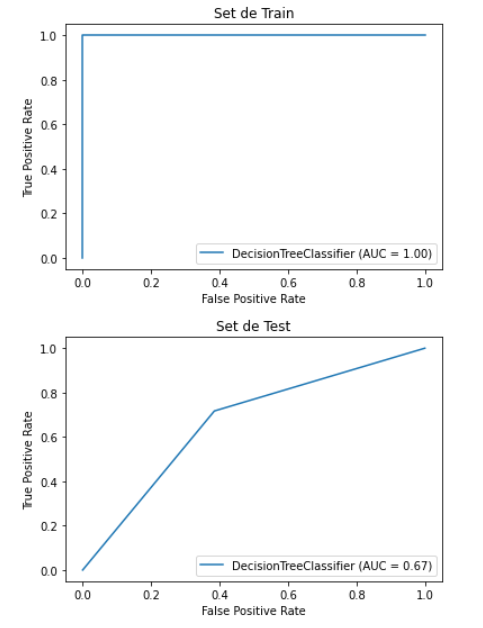

Es por eso que decidimos también aplicar GridSearchCV para hacer esta búsqueda exhaustiva sobre los parámetros. Encontramos los mejores:

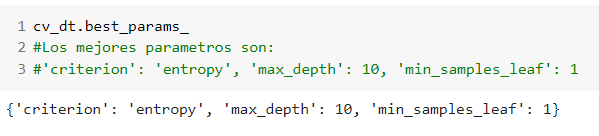

Y ahora sí el modelo está sobreajustando bastante menos, aunque la Regresión Logística con GridSearchCV sigue siendo el modelo que mejor funciona hasta ahora.

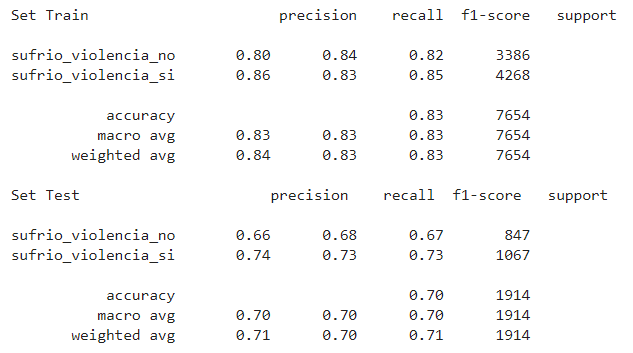

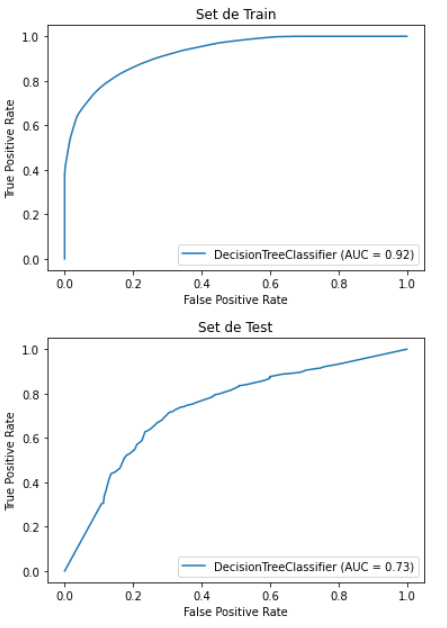

Las dos variables, con sentido, que mejor explican este modelo son el **el numero de parejas** y la **edad** de la persona encuestada.
Llamativamente, el **peso** resulta ser la tercer feature que mejor explicaria las predicciones de este modelo.


Las curvas ROC nos muestran un AUC de 0.92 para train y de 0.73 para test. Si bien el valor de trian es alto, el de test es comparativamente bajo. Por lo que el arbol tiende a 'aprenderse' demasiado bien los datos de entrenamiento y nos devuelve una prediccion con los datos de test bastante pobre. 
El modelo de regresion logistica da mejores resutados, ya que es mas homogeneo, con valores de AUC de 0.87 para train y 0.82 para test. Es decir, predice mejor y no se 'aprende' tan de memoria los datos de train. Esto tal vez tenga que ver con que busca probabilidades y no clasifica de forma tan cerrada como el arbol. Y precisamente, lo que buscamos en nuestras predicciones son probabilidades de pertenecer o no a un grupo de personas propenso a encontrarse con comportamientos violentos de una pareja. 


##**Perceptron**

Por último implementamos el algoritmo de Perceptron que obtuvo los peores resultados hasta el momento.

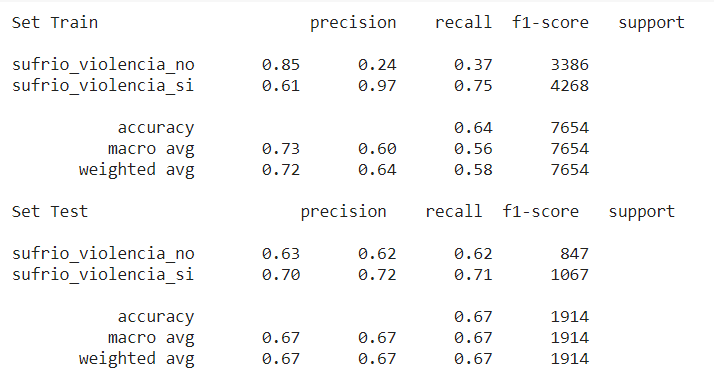




##**Conclusión**
Como habíamos previsto, el modelo de regresión logística nos parece la mejor opción. Los modelos perceptrón y árbol de decisión nos otorgarían tendencias marcadas, que no se corresponden con lo que sucede en la realidad. 

Es fundamental la utilización de GridSearchCV para comprender mejor cuál es el mejor modelo y sus hiperparámetros.




###**Análisis y modelos**




In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, auc, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, plot_confusion_matrix

# Importamos las funciones y el diccionario creados en el archivo functions.py
import functions

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Seteamos opciones de visualización de los datos
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)
warnings.filterwarnings('ignore')

In [3]:
# Importamos el dataset y seteamos aquellos espacios en vacíos para que sean leídos como NAs
url = 'https://drive.google.com/file/d/1CPlW53w9zNWWNyF_7xLDsPysKSDNVAvo/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataset = pd.read_csv(path, na_values=[' ', '  ', '', 'NaN', 'nan'])

In [4]:
# Utilizamos la funcion para renombrar que toma como argumentos nuestro dataset original y el diccionario guardado en functions.py
dataset_renombrado = functions.rename_columns(dataset, functions.columnas_nuevas)
dataset_renombrado.sample(2)

,info_personal_codigo_estudio,info_personal_nro_registro,info_personal_nro_encuesta,info_personal_fecha_inicio,info_personal_hora_inicio,info_personal_fecha_fin,info_personal_hora_fin,info_personal_duracion_encuesta,info_personal_comunidad_autonoma,info_pesonal_provincia,info_personal_municipio,info_personal_distrito,info_personal_seccion,info_personal_capital,info_personal_tamanio_municipio,info_personal_coordinador,info_personal_nro_entevistador,info_personal_sit_laboral_actual,info_personal_frec_reuniones_familiares,info_personal_persona_confianza,info_personal_persona_acoger,info_personal_tiene_hijes,info_personal_tiene_hijes_menores,info_personal_nro_hijes_menores,info_personal_nro_hijes_menores_convive,info_personal_otros_menores_convive,info_personal_nro_menores_convive,info_personal_estado_salud_ultimo_anio,info_personal_insomnio_ultimo_anio,info_personal_fatiga_ultimo_anio,info_personal_cambiodeanimo_utlimo_anio,info_personal_irritabilidad_ultimo_anio,info_personal_tristeza_ultimo_anio,info_personal_llorar_ultimo_anio,info_personal_angustia_ultimo_anio,info_personal_ninguna_anterior_ultimo_anio,info_personal_no_corresponde,info_personal_discapacidad,info_personal_limitaciones_por_mas_de_un_anio,info_personal_un_dia_en_cama_ultimo_anio,info_personal_visita_medico_ultimo_anio,info_personal_internada_ultimo_anio,info_personal_servicio_urgencia_ultimo_anio,info_personal_psicologo_psiquiatra_ultimo_anio,info_personal_tranquilizantes_ultimo_anio,info_personal_antidepresivos_ultimo_anio,info_personal_analgesicos_ultimo_anio,info_personal_ningun_medicamento_ultimo_anio,info_personal_no_corresponde_ultimo_anio,info_personal_pensamientos_suicidas,info_personal_pensamientos_suicidas_ultimo_anio,info_personal_intento_suicidio,info_personal_intento_suicidio_ultimo_anio,info_personal_nro_parejas,info_personal_sexo_parejas,info_personal_tiene_pareja,info_personal_convive_con_pareja,info_personal_sit_legal_con_pareja,info_personal_tiempo_con_pareja_actual,vpsico_pareja_actual_no_ver_amigos,vpsico_pareja_actual_no_ver_familia,vpsico_pareja_actual_donde_estoy,vpsico_pareja_actual_me_ignora,vpsico_pareja_actual_hablar_con_otros,vpsico_pareja_actual_sospecha_infidelidad,vpsico_pareja_actual_pedir_permiso,vpsico_pareja_actual_no_da_dinero,vpsico_pareja_actual_decisiones_hogar,vpsico_pareja_actual_trabajar_estudiar,vpsico_pareja_actual_usa_tu_dinero,vpsico_pareja_acutal_ultimo_anio_no_ver_amigos,vpsico_pareja_actual_ultimo_anio_no_ver_familia,vpsico_pareja_actual_ultimo_anio_donde_estoy,vpsico_pareja_actual_ultimo_anio_me_ignora,vpsico_pareja_actual_ultimo_anio_hablar_con_otros,...,info_personal_uso_internet,info_personal_escala_simpatia_feminismo,info_personal_telefono,info_personal_entrevista_lugar,info_personal_entrevista_quiso_abandonar,info_personal_entrevista_se_sintio_incomoda,info_personal_entrevista_prisa_por_terminar,info_personal_entrevista_ninguna_anteriores,info_personal_entrevista_presencia_terceros,info_personal_entrevista_presencia_padre,info_personal_entrevista_presencia_madre,info_personal_entrevista_presencia_pareja_hombre,info_personal_entrevista_presencia_pareja_mujer,info_personal_entrevista_presencia_hijos,info_personal_entrevista_presencia_hijas,info_personal_entrevista_presencia_vecinos,info_personal_entrevista_presencia_otros,info_personal_entrevista_presencia_NC,info_personal_entrevista_uso_tarjetas,info_personal_entrevista_oculto_violencia,info_personal_nivel_estudios_pareja_actual,info_personal_nivel_estudios_persona_entrevistada,info_personal_ocupacion_persona_entrevistada,info_personal_ocupacion_rama_persona_entrevistada,info_personal_ocupacion_persona_ingresos_principales,info_personal_ocupacion_rama_persona_ingresos_principales,info_personal_peso_persona_entrevistada,info_personal_sit_laboral_ocupada_no_ocupada,M1P2,acoso_sexual_reiterado_informo_compañerx_estudios,acoso_sexual_reiterado_informo_linea_ayuda,acoso_sexual_reiterado_informo_redes_sociales,acoso_sexual_reiterado_informo_otra_persona,acoso_sexua

In [5]:
# Verificamos si existen datos nulos o faltantes en todo el dataset
# Cabe destacar que cuando importamos el dataset, seteamos la lectura de forma tal que los valores vacios sean leidos como nans

#Calculamos el porcentaje de NaNs
missing_value_counts = dataset_renombrado.isnull().sum()
total_cells = np.product(dataset_renombrado.shape)
total_missing = missing_value_counts.sum()
(total_missing/total_cells) * 100

2.763756455505864

In [6]:
#Traemos aquellas columnas en las cuales haya valores faltantes
missing_value_columns = dataset_renombrado.columns[dataset_renombrado.isnull().any()].tolist()
df_missing = dataset_renombrado[missing_value_columns]


In [7]:
#Investigamos qué valores toma cada una de estas columnas, para decidir si es posible imputar o no
for column in df_missing.columns:
  print(column)
  print(df_missing[column].unique())

info_personal_insomnio_ultimo_anio
['Menciona' nan]
info_personal_fatiga_ultimo_anio
['Menciona' nan]
info_personal_cambiodeanimo_utlimo_anio
['Menciona' nan]
info_personal_irritabilidad_ultimo_anio
['Menciona' nan]
info_personal_tristeza_ultimo_anio
['Menciona' nan]
info_personal_llorar_ultimo_anio
['Menciona' nan]
info_personal_angustia_ultimo_anio
['Menciona' nan]
info_personal_ninguna_anterior_ultimo_anio
[nan 'Menciona']
info_personal_no_corresponde
[nan 'Menciona']
info_personal_tranquilizantes_ultimo_anio
[nan 'Menciona']
info_personal_antidepresivos_ultimo_anio
[nan 'Menciona']
info_personal_analgesicos_ultimo_anio
[nan 'Menciona']
info_personal_ningun_medicamento_ultimo_anio
['Menciona' nan]
info_personal_no_corresponde_ultimo_anio
[nan 'Menciona']
VFS_P
[nan 'Menciona']
VPFSM_P
[nan 'Menciona']
acoso_sexual_reiterado_relacion_agresor_pareja_actual_ex
['N.P.' nan 'Menciona']
info_personal_sit_laboral_ultimo_trabajo_remunerado
['20' nan '36' '49' '46' '1' '9' '16' '5' '61' '6' 

Dentro de las columnas con nans identificamos 3 tipos:
1. Aquellas que no pueden imputarse y deben ser descartadas
2. Aquellas en las que la persona entrevistadora sólo rellenó los casos en que la mujer entrevistada "menciona" afirmativamente y el resto los completó con un string 'NaN'
3. Aquellas en que corresponde rellenar el NaN con "N.C." que es la categoría asignada a No Contesta

In [8]:
#Dropeamos aquellas columnas con muchos nans que no pueden imputarse
dataset_renombrado.drop(columns=['info_personal_ocupacion_persona_entrevistada', 
                                 'info_personal_ocupacion_rama_persona_entrevistada',
                                 'info_personal_ocupacion_persona_ingresos_principales',           
                                 'info_personal_ocupacion_rama_persona_ingresos_principales',
                                 'info_personal_sit_laboral_ultimo_trabajo_remunerado',
                                 'info_personal_momento_finalizacion_ultimo_trabajo_remunerado',
                                 'VFS_P',
                                 'VPFSM_P',
                                 'info_personal_coordinador',
                                 'info_personal_codigo_estudio',
                                 'M1P2',
                                 'PESOCCAA'
                                 ], inplace=True)

In [9]:
#Renombramos con N.C. aquellas preguntas que deben rellenarse con N.C.
dataset_renombrado[['info_personal_ocupacion',
                    'info_personal_ocupacion_rama',
                    'info_personal_ocupacion_persona_ingresos_ppales',
                    'info_personal_ocupacion_persona_ingresos_ppales_rama',
                    'info_personal_nivel_de_estudios_entrevistada',
                    'SDE5A_2',
                    'info_personal_relacion_laboral_entrevistada',
                    'SDE8A',
                    'info_personal_relacion_persona_que_mas_aporta_hogar',
                    'info_personal_sit_laboral_persona_que_mas_aporta_hogar',
                    'SDE9D']] = dataset_renombrado[['info_personal_ocupacion',
                    'info_personal_ocupacion_rama',
                    'info_personal_ocupacion_persona_ingresos_ppales',
                    'info_personal_ocupacion_persona_ingresos_ppales_rama',
                    'info_personal_nivel_de_estudios_entrevistada',
                    'SDE5A_2',
                    'info_personal_relacion_laboral_entrevistada',
                    'SDE8A',
                    'info_personal_relacion_persona_que_mas_aporta_hogar',
                    'info_personal_sit_laboral_persona_que_mas_aporta_hogar',
                    'SDE9D']].fillna('N.C.')


In [10]:
#Renombramos con No aquellas preguntas que deben rellenarse con No
dataset_renombrado[['info_personal_insomnio_ultimo_anio',
                    'info_personal_fatiga_ultimo_anio',
                    'info_personal_cambiodeanimo_utlimo_anio',
                    'info_personal_irritabilidad_ultimo_anio',
                    'info_personal_tristeza_ultimo_anio',
                    'info_personal_llorar_ultimo_anio',
                    'info_personal_angustia_ultimo_anio',
                    'info_personal_ninguna_anterior_ultimo_anio',
                    'info_personal_no_corresponde',
                    'info_personal_tranquilizantes_ultimo_anio',
                    'info_personal_antidepresivos_ultimo_anio',
                    'info_personal_analgesicos_ultimo_anio',
                    'info_personal_ningun_medicamento_ultimo_anio',
                    'info_personal_no_corresponde_ultimo_anio',
                    'info_personal_convive_pareja',
                    'info_personal_convive_expareja',
                    'info_personal_convive_madre_padre',
                    'info_personal_convive_suegrx',
                    'info_personal_convive_hijxs',
                    'info_personal_convive_hijxs_pareja',
                    'info_personal_convive_hermanxs',
                    'info_personal_convive_abuelxs' ,
                    'info_personal_convive_nietxs',
                    'info_personal_convive_otros_parientes',
                    'info_personal_convive_personas_no_emparentadas',
                    'info_personal_convive_servicio_domestico',
                    'info_personal_convive_familia_para_la_que_trabaja',
                    'info_personal_convive_NC',
                    'info_personal_entrevista_presencia_padre',
                    'info_personal_entrevista_presencia_madre',                              
                    'info_personal_entrevista_presencia_pareja_hombre',
                    'info_personal_entrevista_presencia_pareja_mujer',
                    'info_personal_entrevista_presencia_hijos',
                    'info_personal_entrevista_presencia_hijas',
                    'info_personal_entrevista_presencia_vecinos',
                    'info_personal_entrevista_presencia_otros',
                    'info_personal_entrevista_presencia_NC',
                    'acoso_sexual_reiterado_relacion_agresor_pareja_actual_ex']] = dataset_renombrado[['info_personal_insomnio_ultimo_anio',
                    'info_personal_fatiga_ultimo_anio',
                    'info_personal_cambiodeanimo_utlimo_anio',
                    'info_personal_irritabilidad_ultimo_anio',
                    'info_personal_tristeza_ultimo_anio',
                    'info_personal_llorar_ultimo_anio',
                    'info_personal_angustia_ultimo_anio',
                    'info_personal_ninguna_anterior_ultimo_anio',
                    'info_personal_no_corresponde',
                    'info_personal_tranquilizantes_ultimo_anio',
                    'info_personal_antidepresivos_ultimo_anio',
                    'info_personal_analgesicos_ultimo_anio',
                    'info_personal_ningun_medicamento_ultimo_anio',
                    'info_personal_no_corresponde_ultimo_anio',
                    'info_personal_convive_pareja',
                    'info_personal_convive_expareja',
                    'info_personal_convive_madre_padre',
                    'info_personal_convive_suegrx',
                    'info_personal_convive_hijxs',
                    'info_personal_convive_hijxs_pareja',
                    'info_personal_convive_hermanxs',
                    'info_personal_convive_abuelxs' ,
                    'info_personal_convive_nietxs',
                    'info_personal_convive_otros_parientes',
                    'info_personal_convive_personas_no_emparentadas',
                    'info_personal_convive_servicio_domestico',
                    'info_personal_convive_familia_para_la_que_trabaja',
                    'info_personal_convive_NC',
                    'info_personal_entrevista_presencia_padre',
                    'info_personal_entrevista_presencia_madre',                              
                    'info_personal_entrevista_presencia_pareja_hombre',
                    'info_personal_entrevista_presencia_pareja_mujer',
                    'info_personal_entrevista_presencia_hijos',
                    'info_personal_entrevista_presencia_hijas',
                    'info_personal_entrevista_presencia_vecinos',
                    'info_personal_entrevista_presencia_otros',
                    'info_personal_entrevista_presencia_NC',
                    'acoso_sexual_reiterado_relacion_agresor_pareja_actual_ex']].fillna('No')
   

In [11]:
# Verificamos si existen datos repetidos en las filas
# Vamos a chequear si existen filas duplicadas en nuestro data frame fijandonos en la columna "nro de encuesta"
df = dataset_renombrado
df.drop_duplicates('info_personal_nro_encuesta', inplace=True)

La cantidad de filas es la misma lugo de aplicar drop_duplicates que en nuestro data frame origina, por lo que no existen datos duplicados. En este caso, un dato duplicado se corresponderia a personas encuestadas cargadas en el archivo mas de una vez.

In [12]:
# Confirmamos que no haya mas datos faltantes
missing_value_counts = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_value_counts.sum()
(total_missing/total_cells) * 100

0.0

In [13]:
#Funcion que trae el dataset de informacion personal de la entrevistada
df_info_personal = functions.recuperar_info_personal(dataset_renombrado)
df_info_personal.sample()

,info_personal_nro_registro,info_personal_nro_encuesta,info_personal_fecha_inicio,info_personal_hora_inicio,info_personal_fecha_fin,info_personal_hora_fin,info_personal_duracion_encuesta,info_personal_comunidad_autonoma,info_personal_municipio,info_personal_distrito,info_personal_seccion,info_personal_capital,info_personal_tamanio_municipio,info_personal_nro_entevistador,info_personal_sit_laboral_actual,info_personal_frec_reuniones_familiares,info_personal_persona_confianza,info_personal_persona_acoger,info_personal_tiene_hijes,info_personal_tiene_hijes_menores,info_personal_nro_hijes_menores,info_personal_nro_hijes_menores_convive,info_personal_otros_menores_convive,info_personal_nro_menores_convive,info_personal_estado_salud_ultimo_anio,info_personal_insomnio_ultimo_anio,info_personal_fatiga_ultimo_anio,info_personal_cambiodeanimo_utlimo_anio,info_personal_irritabilidad_ultimo_anio,info_personal_tristeza_ultimo_anio,info_personal_llorar_ultimo_anio,info_personal_angustia_ultimo_anio,info_personal_ninguna_anterior_ultimo_anio,info_personal_no_corresponde,info_personal_discapacidad,info_personal_limitaciones_por_mas_de_un_anio,info_personal_un_dia_en_cama_ultimo_anio,info_personal_visita_medico_ultimo_anio,info_personal_internada_ultimo_anio,info_personal_servicio_urgencia_ultimo_anio,info_personal_psicologo_psiquiatra_ultimo_anio,info_personal_tranquilizantes_ultimo_anio,info_personal_antidepresivos_ultimo_anio,info_personal_analgesicos_ultimo_anio,info_personal_ningun_medicamento_ultimo_anio,info_personal_no_corresponde_ultimo_anio,info_personal_pensamientos_suicidas,info_personal_pensamientos_suicidas_ultimo_anio,info_personal_intento_suicidio,info_personal_intento_suicidio_ultimo_anio,info_personal_nro_parejas,info_personal_sexo_parejas,info_personal_tiene_pareja,info_personal_convive_con_pareja,info_personal_sit_legal_con_pareja,info_personal_tiempo_con_pareja_actual,acoso_sexual_reiterado_publicacion_info_personal_victima,info_personal_sit_laboral_trabajo_remunerado_en_vida,info_personal_ocupacion,info_personal_ocupacion_rama,info_personal_ocupacion_persona_ingresos_ppales,info_personal_ocupacion_persona_ingresos_ppales_rama,info_personal_religiosidad,info_personal_uso_internet,info_personal_escala_simpatia_feminismo,info_personal_telefono,info_personal_entrevista_lugar,info_personal_entrevista_quiso_abandonar,info_personal_entrevista_se_sintio_incomoda,info_personal_entrevista_prisa_por_terminar,info_personal_entrevista_ninguna_anteriores,info_personal_entrevista_presencia_terceros,info_personal_entrevista_presencia_padre,info_personal_entrevista_presencia_madre,info_personal_entrevista_presencia_pareja_hombre,info_personal_entrevista_presencia_pareja_mujer,info_personal_entrevista_presencia_hijos,info_personal_entrevista_presencia_hijas,info_personal_entrevista_presencia_vecinos,info_personal_entrevista_presencia_otros,info_personal_entrevista_presencia_NC,info_personal_entrevista_uso_tarjetas,info_personal_entrevista_oculto_violencia,info_personal_nivel_estudios_pareja_actual,info_personal_nivel_estudios_persona_entrevistada,info_personal_peso_persona_entrevistada,info_personal_sit_laboral_ocupada_no_ocupada,info_personal_edad_persona_entrevistada,info_personal_nacionalidad_entrevistada,info_personal_estudios_entrevistada,info_personal_nivel_de_estudios_entrevistada,info_personal_estudios_entrevistada_recodificada,info_personal_relacion_laboral_entrevistada,info_personal_fuente_ingresos_principales,info_personal_persona_que_mas_aporta_hogar,info_personal_relacion_persona_que_mas_aporta_hogar,info_personal_sit_laboral_persona_que_mas_aporta_hogar,info_personal_tamano_hogar,info_personal_convive_pareja,info_personal_convive_expareja,info_personal_convive_madre_padre,info_personal_convive_suegrx,info_personal_convive_hijxs,info_personal_convive_hijxs_pareja,info_personal_convive_hermanxs,info_personal_convive_abuelxs,info_personal_convive_nietxs,info_personal_convive_otros_parientes,info_personal_convive_personas_no_empa

In [14]:
#En este punto vamos a comenzar el proceso de generar el target de si hubo violencia o no.
#Para eso lo primero que hacemos es generar un dataset con los indicadores de si hubo o no violencia de diferente tipo
dataset_indicadores = dataset_renombrado[functions.columnas_indicadoras]
dataset_indicadores.sample()

,vpsico_pareja_actual_no_da_dinero,vsexual_vfisica_pareja_pasada_aborto,acoso_sexual_comportamiento_contacto_fisico_no_deseado,vpsico_pareja_pasada_hablar_con_otros,acoso_sexual_reiterado_ultimo_momento_vivido,acoso_sexual_comportamiento_contenido_sexual_redes,acoso_sexual_comportamiento_obligar_ver_porno,vsexual_vfisica_pareja_pasada_dolencias_internas,vsexual_vfisica_pareja_pasada_dolencias_externas,acoso_sexual_reiterado_duracion,vpsico_pareja_actual_intimida,vpsico_pareja_pasada_intimida,vpsico_pareja_pasada_humilla,vsexual_vfisica_pareja_pasada_danio_permanente,vpsico_pareja_pasada_sospecha_infidelidad,vsexual_vfisica_pasada_depresion,vsexual_vfisica_pasada_autolesion_suicidio,vpsico_pareja_pasada_no_ver_amigos,vsexual_pareja_pasada_sexo_intento,vpsico_pareja_pasada_no_da_dinero,vsexual_pareja_actual_sexo_otra_practica_sexual,vpsico_pareja_pasada_pedir_permiso,vfisica_pareja_actual_golpe_punio,vfisica_pareja_pasada_golpe_punio,vsexual_pareja_pasada_sexo_miedo,vfisica_pareja_actual_amenaza_arma,vsexual_pareja_actual_sexo_intento,vsexual_fuera_pareja_obligar_sexo_drogas,vpsico_pareja_pasada_trabajar_estudiar,acoso_sexual_comportamiento_otros comportamientos,vfisica_pareja_actual_patadas_palizas,acoso_sexual_reiterado_llamadas_mensajes,vpsico_pareja_actual_amenaza_danio_si_mismo,acoso_sexual_reiterado_publicacion_info_personal_victima,vpsico_pareja_actual_no_ver_familia,vfisica_pareja_actual_uso_fuerza,vpsico_pareja_pasada_amenaza_danio_terceros,vpsico_pareja_pasada_amenaza_danio,vpsico_pareja_actual_me_ignora,vsexual_pareja_actual_sexo_amenazada,vsexual_fuera_pareja_tocar_agresor_sin_consentimiento,vfisica_fuera_pareja_danios_N.C.,acoso_sexual_reiterado_daños_materiales,vfisica_fuera_pareja_patadas,vsexual_fuera_pareja_tocar_victima_sin_consentimiento,vpsico_pareja_actual_usa_tu_dinero,vfisica_fuera_pareja_danios_fuera_pareja_heridas_profundas,vpsico_pareja_actual_donde_estoy,vsexual_pareja_pasada_sexo_amenazada,vfisica_pareja_pasada_amenaza_arma,vsexual_pareja_actual_sexo_tocarle,vsexual_fuera_pareja_obligar_sexo_sin_quererlo,vpsico_pareja_actual_amenaza_danio,vsexual_vfisica_pasada_concentracion_memoria,vfisica_fuera_pareja_abofetear,vpsico_pareja_pasada_insulta,vfisica_fuera_pareja_danios_moretones,vsexual_vfisica_pareja_pasada_heridas_profundas,vfisica_pareja_pasada_patadas_palizas,vfisica_fuera_pareja_otras_maneras,vsexual_vfisica_pasada_impotencia,vpsico_pareja_pasada_no_ver_familia,vsexual_fuera_pareja_moretones,acoso_sexual_reiterado_seguido_espiado,vpsico_pareja_actual_sospecha_infidelidad,vsexual_vfisica_pareja_pasada_discapacidad,vfisica_fuera_pareja_arma,vsexual_fuera_pareja_obligar_sexo_amenazas,vsexual_vfisica_pasada_ansidad_fobia_panico,acoso_sexual_comportamiento_insinuaciones_internet,vsexual_pareja_actual_sexo_miedo,vpsico_pareja_actual_pedir_permiso,vsexual_pareja_actual_sexo_obligada,vsexual_pareja_pasada_sexo_drogada,vfisica_pareja_pasada_asfixiar_quemar,vpsicopareja_actual_humilla,vsexual_vfisica_pareja_pasada_lesiongenital,vpsico_pareja_actual_amenaza_quitar_hijes,vfisica_fuera_pareja_empujar,vpsico_pareja_pasada_decisiones_hogar,acoso_sexual_reiterado_infancia_adolescencia,acoso_sexual_reiterado_frecuencia,vpsico_pareja_pasada_amenaza_quitar_hijes,acoso_sexual_comportamiento_exhibicion_indecente,vfisica_pareja_pasada_abofetea,acoso_sexual_comportamiento_imagenes_sexualmente_explicitas,vsexual_vfisica_pareja_pasada_otros_danios,vpsico_pareja_actual_decisiones_hogar,vpsico_pareja_actual_no_ver_amigos,vfisica_pareja_actual_asfixiar_quemar,vsexual_fuera_pareja_otros_tipos,vpsico_pareja_pasada_me_ignora,acoso_sexual_reiterado_esperar_fuera_casa_trabajo_colegio,vpsico_pareja_actual_amenaza_danio_terceros,acoso_sexual_comportamiento_sugerencias_encuentros,acoso_sexual_reiterado_llamadas_mensajes_obscenos,vfisica_fuera_pareja_danios_cronicos,vsexual_vfisica_pareja_pasada_ETS,vfisica_fuera_pareja_asfixiar,vsexual_fuera_pareja_obligar_sexo_miedo,vsexual_pareja_pasada_sexo_obligada,vpsico_pareja_pasada_usa_tu_d

In [15]:
# Generamos una función que va a iterar entre las filas y va a ver si alguno de los valores está, si está devuelve True.
def target_column(row):
  return (row == "Si").any() or \
  (row == "Sí").any() or \
  (row == "Frecuentemente").any() or \
  (row == "Algunas veces").any() or \
  (row == "Menciona").any()

In [16]:
#Le pasamos la función que hicimos para una sola fila a todo el dataset, poniendo los valores obtenidos en una variable nueva llamada "target"
dataset_indicadores['target'] = dataset_indicadores.apply(target_column, axis=1)
dataset_indicadores['target'].value_counts()

True     5335
False    4233
Name: target, dtype: int64

In [17]:
#Verificamos que no haya valores más allá de los booleanos
dataset_indicadores['target'].unique()

array([False,  True])

In [18]:
#Reemplazamos True por 1 y False por 0
dataset_indicadores['target'].replace({True:1, False: 0}, inplace=True)

In [19]:
#Para realizar el encoding, vamos a seleccionar aquellas variables numéricas que no es necesario encodear
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df_info_personal.select_dtypes(include=numerics)
num_df.columns

Index(['info_personal_nro_registro', 'info_personal_nro_encuesta',
       'info_personal_duracion_encuesta',
       'info_personal_peso_persona_entrevistada',
       'info_personal_edad_persona_entrevistada'],
      dtype='object')

In [20]:
#Sacamos las columnas que tienen demasiadas categorías, para escalarlas luego en vez de realizarles OneHotEncoding y nos quedamos con las columnas con pocas categorías
categorical_cols = df_info_personal.drop(columns=[ 
                                                    'info_personal_nro_registro',
                                                    'info_personal_nro_encuesta',
                                                    'info_personal_duracion_encuesta',
                                                    'info_personal_peso_persona_entrevistada', 
                                                    'info_personal_edad_persona_entrevistada',
                                                    'info_personal_fecha_inicio',
                                                    'info_personal_hora_inicio',
                                                    'info_personal_fecha_fin',
                                                    'info_personal_hora_fin',
                                                    ])
categorical_cols.head()

,info_personal_comunidad_autonoma,info_personal_municipio,info_personal_distrito,info_personal_seccion,info_personal_capital,info_personal_tamanio_municipio,info_personal_nro_entevistador,info_personal_sit_laboral_actual,info_personal_frec_reuniones_familiares,info_personal_persona_confianza,info_personal_persona_acoger,info_personal_tiene_hijes,info_personal_tiene_hijes_menores,info_personal_nro_hijes_menores,info_personal_nro_hijes_menores_convive,info_personal_otros_menores_convive,info_personal_nro_menores_convive,info_personal_estado_salud_ultimo_anio,info_personal_insomnio_ultimo_anio,info_personal_fatiga_ultimo_anio,info_personal_cambiodeanimo_utlimo_anio,info_personal_irritabilidad_ultimo_anio,info_personal_tristeza_ultimo_anio,info_personal_llorar_ultimo_anio,info_personal_angustia_ultimo_anio,info_personal_ninguna_anterior_ultimo_anio,info_personal_no_corresponde,info_personal_discapacidad,info_personal_limitaciones_por_mas_de_un_anio,info_personal_un_dia_en_cama_ultimo_anio,info_personal_visita_medico_ultimo_anio,info_personal_internada_ultimo_anio,info_personal_servicio_urgencia_ultimo_anio,info_personal_psicologo_psiquiatra_ultimo_anio,info_personal_tranquilizantes_ultimo_anio,info_personal_antidepresivos_ultimo_anio,info_personal_analgesicos_ultimo_anio,info_personal_ningun_medicamento_ultimo_anio,info_personal_no_corresponde_ultimo_anio,info_personal_pensamientos_suicidas,info_personal_pensamientos_suicidas_ultimo_anio,info_personal_intento_suicidio,info_personal_intento_suicidio_ultimo_anio,info_personal_nro_parejas,info_personal_sexo_parejas,info_personal_tiene_pareja,info_personal_convive_con_pareja,info_personal_sit_legal_con_pareja,info_personal_tiempo_con_pareja_actual,acoso_sexual_reiterado_publicacion_info_personal_victima,info_personal_sit_laboral_trabajo_remunerado_en_vida,info_personal_ocupacion,info_personal_ocupacion_rama,info_personal_ocupacion_persona_ingresos_ppales,info_personal_ocupacion_persona_ingresos_ppales_rama,info_personal_religiosidad,info_personal_uso_internet,info_personal_escala_simpatia_feminismo,info_personal_telefono,info_personal_entrevista_lugar,info_personal_entrevista_quiso_abandonar,info_personal_entrevista_se_sintio_incomoda,info_personal_entrevista_prisa_por_terminar,info_personal_entrevista_ninguna_anteriores,info_personal_entrevista_presencia_terceros,info_personal_entrevista_presencia_padre,info_personal_entrevista_presencia_madre,info_personal_entrevista_presencia_pareja_hombre,info_personal_entrevista_presencia_pareja_mujer,info_personal_entrevista_presencia_hijos,info_personal_entrevista_presencia_hijas,info_personal_entrevista_presencia_vecinos,info_personal_entrevista_presencia_otros,info_personal_entrevista_presencia_NC,info_personal_entrevista_uso_tarjetas,info_personal_entrevista_oculto_violencia,info_personal_nivel_estudios_pareja_actual,info_personal_nivel_estudios_persona_entrevistada,info_personal_sit_laboral_ocupada_no_ocupada,info_personal_nacionalidad_entrevistada,info_personal_estudios_entrevistada,info_personal_nivel_de_estudios_entrevistada,info_personal_estudios_entrevistada_recodificada,info_personal_relacion_laboral_entrevistada,info_personal_fuente_ingresos_principales,info_personal_persona_que_mas_aporta_hogar,info_personal_relacion_persona_que_mas_aporta_hogar,info_personal_sit_laboral_persona_que_mas_aporta_hogar,info_personal_tamano_hogar,info_personal_convive_pareja,info_personal_convive_expareja,info_personal_convive_madre_padre,info_personal_convive_suegrx,info_personal_convive_hijxs,info_personal_convive_hijxs_pareja,info_personal_convive_hermanxs,info_personal_convive_abuelxs,info_personal_convive_nietxs,info_personal_convive_otros_parientes,info_personal_convive_personas_no_emparentadas,info_personal_convive_servicio_domestico,info_personal_convive_familia_para_la_que_trabaja,info_personal_convive_NC,info_personal_ingresos_hogar
0,Andalucía,Mun.<=100.000 hab. no capitales de CA o provincia,Anonimizado,Anonimizado,Otros municipios,2.001 a 1

In [21]:
# Usamos MinMaxScaler para que las columnas que tienen muchos valores posibles tomen un valor entre 0 y 1. No usamos las fechas porque no funciona
data_num = df_info_personal[['info_personal_nro_registro',
              'info_personal_nro_encuesta',
              'info_personal_duracion_encuesta',
              'info_personal_peso_persona_entrevistada', 
              'info_personal_edad_persona_entrevistada']]


numerical = data_num

scaler = MinMaxScaler()
numerical = scaler.fit_transform(numerical)
data_numerical = pd.DataFrame(numerical, columns=data_num.columns)
data_numerical

,info_personal_nro_registro,info_personal_nro_encuesta,info_personal_duracion_encuesta,info_personal_peso_persona_entrevistada,info_personal_edad_persona_entrevistada
0,0.000000,0.000000,0.033293,0.828101,0.4625
1,0.000017,0.000103,0.034380,0.833951,0.4875
2,0.000039,0.000206,0.037721,0.890910,0.6500
3,0.000050,0.000309,0.023229,0.828101,0.4250
4,0.000067,0.000413,0.022585,0.890910,0.6500
...,...,...,...,...,...
9563,0.999207,0.999587,0.131200,0.002771,0.2875
9564,0.999329,0.999691,0.082327,0.006194,0.5625
9565,0.999695,0.999794,0.091908,0.004356,0.2125
9566,0.999950,0.999897,0.119122,0.002780,0.1000


In [22]:
#Verificamos cómo se ve la edad de la persona entrevistada
data_numerical['info_personal_edad_persona_entrevistada']

0       0.4625
1       0.4875
2       0.6500
3       0.4250
4       0.6500
         ...  
9563    0.2875
9564    0.5625
9565    0.2125
9566    0.1000
9567    0.2750
Name: info_personal_edad_persona_entrevistada, Length: 9568, dtype: float64

In [23]:
#OneHotEncoding de todas las variables del dataset renombrado
df_encoded = pd.get_dummies(categorical_cols, columns=categorical_cols.columns) #o cualquier subset de datos que querramos encodear
df_encoded.head()

,info_personal_comunidad_autonoma_Andalucía,info_personal_comunidad_autonoma_Aragón,info_personal_comunidad_autonoma_Asturias (Principado de),info_personal_comunidad_autonoma_Balears (Illes),info_personal_comunidad_autonoma_Canarias,info_personal_comunidad_autonoma_Cantabria,info_personal_comunidad_autonoma_Castilla y León,info_personal_comunidad_autonoma_Castilla-La Mancha,info_personal_comunidad_autonoma_Cataluña,info_personal_comunidad_autonoma_Ceuta (Ciudad Autónoma de),info_personal_comunidad_autonoma_Comunitat Valenciana,info_personal_comunidad_autonoma_Extremadura,info_personal_comunidad_autonoma_Galicia,info_personal_comunidad_autonoma_Madrid (Comunidad de),info_personal_comunidad_autonoma_Melilla (Ciudad Autónoma de),info_personal_comunidad_autonoma_Murcia (Región de),info_personal_comunidad_autonoma_Navarra (Comunidad Foral de),info_personal_comunidad_autonoma_País Vasco,info_personal_comunidad_autonoma_Rioja (La),info_personal_municipio_Albacete,info_personal_municipio_Alcalá de Henares,info_personal_municipio_Alcobendas,info_personal_municipio_Alcorcón,info_personal_municipio_Algeciras,info_personal_municipio_Alicante/Alacant,info_personal_municipio_Almería / Barakaldo,info_personal_municipio_Badalona / Badajoz,info_personal_municipio_Bilbao / Jerez de la Frontera,info_personal_municipio_Burgos / Vitoria-Gasteiz,info_personal_municipio_Cartagena / Palmas de Gran Canaria (Las),info_personal_municipio_Castellón de la Plana/Castelló de la Plana / Palma de Mallor,info_personal_municipio_Ceuta / Melilla,info_personal_municipio_Ciudad Real,info_personal_municipio_Coruña (A) / Murcia,info_personal_municipio_Cuenca / Santiago de Compostela,info_personal_municipio_Cáceres,info_personal_municipio_Cádiz,info_personal_municipio_Córdoba,info_personal_municipio_Donostia/San Sebastián / Marbella,info_personal_municipio_Elche/Elx / Getafe,info_personal_municipio_Fuenlabrada,info_personal_municipio_Gijón,info_personal_municipio_Girona / Madrid,info_personal_municipio_Granada,info_personal_municipio_Guadalajara,info_personal_municipio_Hospitalet de Llobregat,info_personal_municipio_Huelva,info_personal_municipio_Huesca,info_personal_municipio_Jaén,info_personal_municipio_La Laguna,info_personal_municipio_Leganés,info_personal_municipio_León / Logroño,info_personal_municipio_Lleida / Palencia,info_personal_municipio_Lugo,info_personal_municipio_Mataró,info_personal_municipio_Mun.<=100.000 hab. no capitales de CA o provincia,info_personal_municipio_Málaga,info_personal_municipio_Móstoles,info_personal_municipio_Ourense,info_personal_municipio_Oviedo,info_personal_municipio_Pamplona/Iruña,info_personal_municipio_Parla,info_personal_municipio_Pontevedra / Santa Cruz de Tenerife / Dos Hermanas,info_personal_municipio_Reus,info_personal_municipio_Sabadell,info_personal_municipio_Salamanca,info_personal_municipio_Santa Coloma de Gramenet,info_personal_municipio_Santander,info_personal_municipio_Segovia,info_personal_municipio_Sevilla,info_personal_municipio_Soria,info_personal_municipio_Tarragona / Torrejón de Ardoz,info_personal_municipio_Telde,info_personal_municipio_Terrassa,info_personal_municipio_Teruel,...,info_personal_sit_laboral_persona_que_mas_aporta_hogar_N.C.,info_personal_sit_laboral_persona_que_mas_aporta_hogar_Otra situación,info_personal_sit_laboral_persona_que_mas_aporta_hogar_Parada y busca su primer empleo,info_personal_sit_laboral_persona_que_mas_aporta_hogar_Parada y ha trabajado antes,info_personal_sit_laboral_persona_que_mas_aporta_hogar_Pensionista (anteriormente no ha trabajado),info_personal_sit_laboral_persona_que_mas_aporta_hogar_Trabaja,info_personal_sit_laboral_persona_que_mas_aporta_hogar_Trabaja o colabora de manera habitual en el negocio familiar,info_personal_sit_laboral_persona_que_mas_aporta_hogar_Trabajo doméstico no remunerado,"info_personal_tamano_hogar_1 persona, vive sola",info_personal_tamano_hogar_10,info_personal_tamano_hogar_11,info_personal_tamano_hogar_2 personas,info_personal_tamano_hogar_3 p

In [24]:
# Hacemos un join del dataset con variables encodeadas, con el dataset de variables numéricas escaladas y de la columna target
df = pd.concat([df_encoded, data_numerical, dataset_indicadores.target], axis=1)

In [25]:
df.head()

,info_personal_comunidad_autonoma_Andalucía,info_personal_comunidad_autonoma_Aragón,info_personal_comunidad_autonoma_Asturias (Principado de),info_personal_comunidad_autonoma_Balears (Illes),info_personal_comunidad_autonoma_Canarias,info_personal_comunidad_autonoma_Cantabria,info_personal_comunidad_autonoma_Castilla y León,info_personal_comunidad_autonoma_Castilla-La Mancha,info_personal_comunidad_autonoma_Cataluña,info_personal_comunidad_autonoma_Ceuta (Ciudad Autónoma de),info_personal_comunidad_autonoma_Comunitat Valenciana,info_personal_comunidad_autonoma_Extremadura,info_personal_comunidad_autonoma_Galicia,info_personal_comunidad_autonoma_Madrid (Comunidad de),info_personal_comunidad_autonoma_Melilla (Ciudad Autónoma de),info_personal_comunidad_autonoma_Murcia (Región de),info_personal_comunidad_autonoma_Navarra (Comunidad Foral de),info_personal_comunidad_autonoma_País Vasco,info_personal_comunidad_autonoma_Rioja (La),info_personal_municipio_Albacete,info_personal_municipio_Alcalá de Henares,info_personal_municipio_Alcobendas,info_personal_municipio_Alcorcón,info_personal_municipio_Algeciras,info_personal_municipio_Alicante/Alacant,info_personal_municipio_Almería / Barakaldo,info_personal_municipio_Badalona / Badajoz,info_personal_municipio_Bilbao / Jerez de la Frontera,info_personal_municipio_Burgos / Vitoria-Gasteiz,info_personal_municipio_Cartagena / Palmas de Gran Canaria (Las),info_personal_municipio_Castellón de la Plana/Castelló de la Plana / Palma de Mallor,info_personal_municipio_Ceuta / Melilla,info_personal_municipio_Ciudad Real,info_personal_municipio_Coruña (A) / Murcia,info_personal_municipio_Cuenca / Santiago de Compostela,info_personal_municipio_Cáceres,info_personal_municipio_Cádiz,info_personal_municipio_Córdoba,info_personal_municipio_Donostia/San Sebastián / Marbella,info_personal_municipio_Elche/Elx / Getafe,info_personal_municipio_Fuenlabrada,info_personal_municipio_Gijón,info_personal_municipio_Girona / Madrid,info_personal_municipio_Granada,info_personal_municipio_Guadalajara,info_personal_municipio_Hospitalet de Llobregat,info_personal_municipio_Huelva,info_personal_municipio_Huesca,info_personal_municipio_Jaén,info_personal_municipio_La Laguna,info_personal_municipio_Leganés,info_personal_municipio_León / Logroño,info_personal_municipio_Lleida / Palencia,info_personal_municipio_Lugo,info_personal_municipio_Mataró,info_personal_municipio_Mun.<=100.000 hab. no capitales de CA o provincia,info_personal_municipio_Málaga,info_personal_municipio_Móstoles,info_personal_municipio_Ourense,info_personal_municipio_Oviedo,info_personal_municipio_Pamplona/Iruña,info_personal_municipio_Parla,info_personal_municipio_Pontevedra / Santa Cruz de Tenerife / Dos Hermanas,info_personal_municipio_Reus,info_personal_municipio_Sabadell,info_personal_municipio_Salamanca,info_personal_municipio_Santa Coloma de Gramenet,info_personal_municipio_Santander,info_personal_municipio_Segovia,info_personal_municipio_Sevilla,info_personal_municipio_Soria,info_personal_municipio_Tarragona / Torrejón de Ardoz,info_personal_municipio_Telde,info_personal_municipio_Terrassa,info_personal_municipio_Teruel,...,info_personal_sit_laboral_persona_que_mas_aporta_hogar_Trabaja o colabora de manera habitual en el negocio familiar,info_personal_sit_laboral_persona_que_mas_aporta_hogar_Trabajo doméstico no remunerado,"info_personal_tamano_hogar_1 persona, vive sola",info_personal_tamano_hogar_10,info_personal_tamano_hogar_11,info_personal_tamano_hogar_2 personas,info_personal_tamano_hogar_3 personas,info_personal_tamano_hogar_4,info_personal_tamano_hogar_5,info_personal_tamano_hogar_6,info_personal_tamano_hogar_7,info_personal_tamano_hogar_8,info_personal_tamano_hogar_9,info_personal_tamano_hogar_N.C.,info_personal_convive_pareja_Menciona,info_personal_convive_pareja_N.P.,info_personal_convive_pareja_No,info_personal_convive_expareja_Menciona,info_personal_convive_expareja_N.P.,info_personal_convive_expareja_No,info_personal_convive_madre_padre_

In [26]:
#Separamos al dataset en X (sin el target) y en y (solo el target)
X = df.drop(['target'],axis=1)
y = df['target']

In [27]:
#Dividimos en train 80% y test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, stratify=y)
X_train.shape, X_test.shape

((7654, 1011), (1914, 1011))

## REGRESION LOGISTICA

In [28]:
#Esto es con todo por default, asi que no tiene penalidad. 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)  # entrenamiento

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
logreg.classes_

array([0, 1])

In [30]:
len(logreg.coef_)

1

In [31]:
y_train_pred = logreg.predict(X_train) # Predigo con datos de entrenamiento
y_test_pred = logreg.predict(X_test) # Predigo con datos de test

In [32]:
#y_pred = logreg.predict(X_test)
print(accuracy_score(y_train, y_train_pred)) # Calculo el acuracy del set entrenamiento
print(accuracy_score(y_test, y_test_pred)) # Calculo el accuracy del set de test

0.770969427750196
0.7277951933124347


Text(0.5, 1.0, 'Set de test')

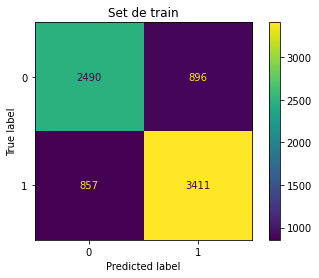

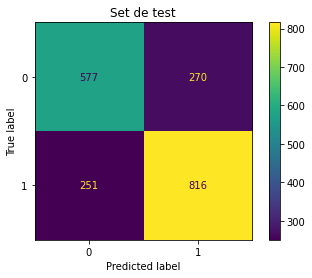

In [33]:
#Armamos las matrices de confusion tanto para los datos de entrenamiento como para los de test
confusion_matrix(y_train, y_train_pred) 
plot_confusion_matrix(logreg, X_train, y_train, values_format = '.0f') # Pedimos que nos haga el grafiquito
plt.title("Set de train")

confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(logreg, X_test, y_test, values_format = '.0f')
plt.title("Set de test")

In [34]:
# Ademas del accuracy, pedimos otras metricas para ver que bien o mal anda nuestro modelo 

labels = ['sufrio_violencia_no','sufrio_violencia_si'] #Pedimos labels para cada caso

print('Set Train', classification_report(y_train, y_train_pred, target_names=labels))
print('Set Test',classification_report(y_test, y_test_pred, target_names=labels))

Set Train                      precision    recall  f1-score   support

sufrio_violencia_no       0.74      0.74      0.74      3386
sufrio_violencia_si       0.79      0.80      0.80      4268

           accuracy                           0.77      7654
          macro avg       0.77      0.77      0.77      7654
       weighted avg       0.77      0.77      0.77      7654

Set Test                      precision    recall  f1-score   support

sufrio_violencia_no       0.70      0.68      0.69       847
sufrio_violencia_si       0.75      0.76      0.76      1067

           accuracy                           0.73      1914
          macro avg       0.72      0.72      0.72      1914
       weighted avg       0.73      0.73      0.73      1914



El accuracy para train (0.77) y para test (0.73) coincide con los valores de accuracy que pedimos antes. Tambien vemos que el f1-score es de 0.74 y 0.80 para train y de 0.69 t 0.76 para los datos de test.
Veamos ahora como se comporta el modelo con distintos thresholds con una curva ROC.

Text(0.5, 1.0, 'Set de Test')

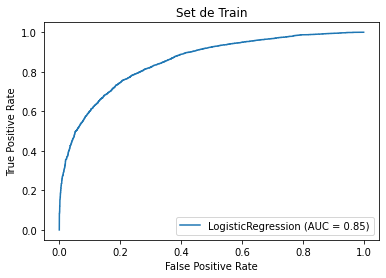

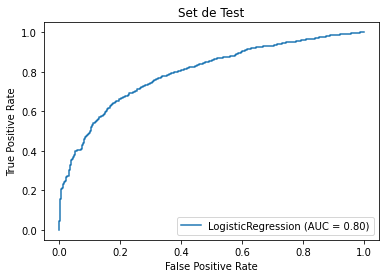

In [35]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(logreg, X_train, y_train)  # Obtenemos un valor de AUC de 0.85 para train
plt.title('Set de Train')

plot_roc_curve(logreg, X_test, y_test) # Obtenemos 0.80 para los datos de test
plt.title('Set de Test')

# Este modelo no esta nada mal. Veamos si podemos mejorarlo.

In [47]:
#Busqueda de parametros  a traves de grilla
param_grid_lr = {
    'penalty': ['l1','l2','elasticnet'],
    'C': [1, 10, 100, 1000000],
    'solver': ['saga','newton-cg','lbfgs'],
    'tol': [1e-3, 1e-4, 1e-2],
    #'max_iter': [100, 1000, 500]
    }
#La combinacion por default es: penalty=l2, solver=lbfgs (en la version 0.22), tol=1e-4, max_iter=100 

model_lr = LogisticRegression(random_state=0)

cv_lr = GridSearchCV(model_lr, param_grid_lr, scoring='accuracy', n_jobs=-1)
cv_lr.fit(X, y)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['saga', 'newton-cg', 'lbfgs'],
                         'tol': [0.001, 0.0001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbo

In [48]:
results_lr = cv_lr.cv_results_

df_lr = pd.DataFrame(results_lr)
df_lr

#df.sort_values(by='rank_test_score').head()
df_lr[['param_C', 'param_solver', 'param_tol', 'param_penalty', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,param_C,param_solver,param_tol,param_penalty,mean_test_score,std_test_score,rank_test_score
0,1,saga,0.001,l1,0.716763,0.015438,1
1,1,saga,0.0001,l1,0.716763,0.015438,1
2,1,saga,0.01,l1,0.713000,0.017077,3
40,10,newton-cg,0.0001,l2,0.710700,0.015775,4
39,10,newton-cg,0.001,l2,0.710700,0.015775,4


In [49]:
cv_lr.best_params_
#La combinacion por default es: penalty=l2, solver=lbfgs (en la version 0.22), tol=1e-4, max_iter=100 
#de la gridSearchCV, obtuvimos que la mejor combinacion de parametros son:
#'C': 1, 'penalty': 'l2', es decir que la fuerza de regularización es muy alta

{'C': 1, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.001}

In [50]:
#REGRESIÓN LOGÍSTICA CON LA MEJOR COMBINACIÓN DE PARAMETROS QUE OBTUVIMOS DEL GRIDSEARCH
lr_chosen = LogisticRegression(random_state=0, penalty='l2', C=1)

In [51]:
#TARDO 1 MINUTO
lr_chosen.fit(X_train, y_train)

y_train_pred_lr = lr_chosen.predict(X_train)
y_test_pred_lr = lr_chosen.predict(X_test)

Set Train                      precision    recall  f1-score   support

sufrio_violencia_no       0.74      0.74      0.74      3386
sufrio_violencia_si       0.79      0.80      0.80      4268

           accuracy                           0.77      7654
          macro avg       0.77      0.77      0.77      7654
       weighted avg       0.77      0.77      0.77      7654

Set Test                      precision    recall  f1-score   support

sufrio_violencia_no       0.70      0.68      0.69       847
sufrio_violencia_si       0.75      0.76      0.76      1067

           accuracy                           0.73      1914
          macro avg       0.72      0.72      0.72      1914
       weighted avg       0.73      0.73      0.73      1914



Text(0.5, 1.0, 'Set de test')

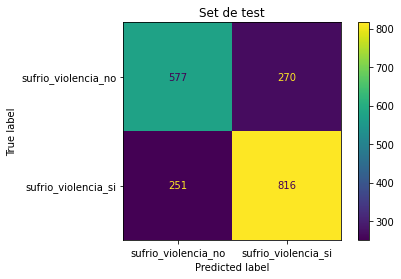

In [52]:
# Pedimos un clasification report para test y train.

labels = ['sufrio_violencia_no','sufrio_violencia_si']

print('Set Train', classification_report(y_train, y_train_pred_lr, target_names=labels))
print('Set Test',classification_report(y_test, y_test_pred_lr, target_names=labels))

# Armamos la matriz de confusion para test.

plot_confusion_matrix(lr_chosen, X_test ,y_test, display_labels=labels,  values_format = '.0f')
plt.title("Set de test")

Si comparamos con los valores del modelo anterior, vemos que obtuvimos una mejora. El accuracy para train ascendio de 0.77 a 0.79 y el accuracy para test paso de 0.73 a 0.74. Si bien al aplicar ambos modelos, con y sin tuneo de hiperparametros, la regresion logistica no overfittea, con este ajuste, mejoramos.
Los valores de f1-score tambien mejoraron: pasaron de 0.74 y 0.80 para train a 0.76 y 0.81. Para test, pasaron de 0.69 y 0.76 a 0.70 y 0.77. 

Text(0.5, 1.0, 'Set de Test')

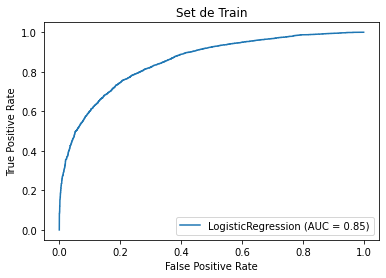

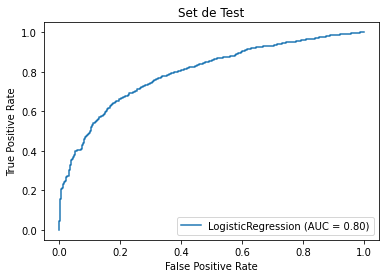

In [53]:
# Las curvas ROC nos indican un 0.87 AUC para train y un 0.82 para test.
# Las metricas nos indican que el modelo mejoro respecto al sin tunear, que habia obtenido valores de AUC de 0.85 para train y 0.80 para test.

plot_roc_curve(lr_chosen, X_train, y_train)  
plt.title('Set de Train')

plot_roc_curve(lr_chosen, X_test, y_test)  
plt.title('Set de Test')

## MODEL ARBOL DE CLASIFICACION 

In [59]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42) # Creamos un objeto con el modelo del arbol

In [60]:
clf.fit(X_train, y_train) # Entrenamos

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [61]:
y_train_pred = clf.predict(X_train) # Predecimos en train

In [62]:
y_test_pred = clf.predict(X_test) # Predecimos en test

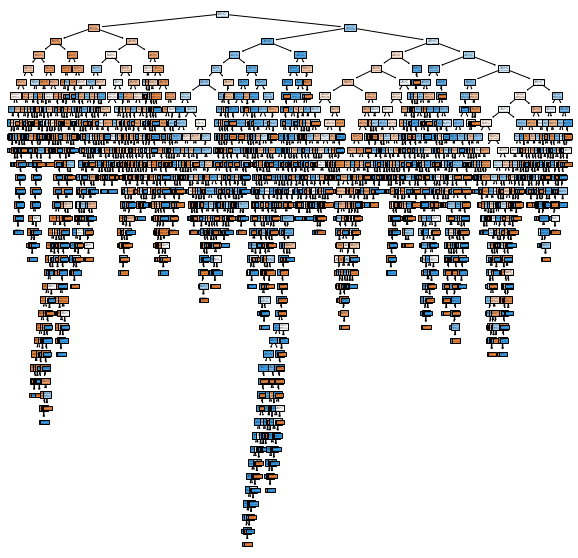

In [63]:
from sklearn.tree import plot_tree # Para tener una idea de como se ve el arbol final, sin ajustar hiperparametros
plt.figure(figsize=(10,10))
plot_tree(clf, filled=True);

Text(0.5, 1.0, 'Set de test')

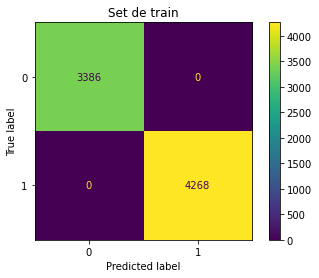

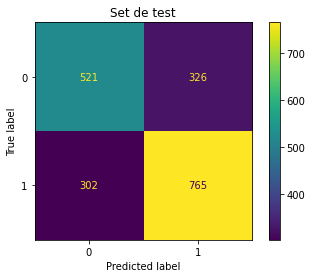

In [64]:
# Armamos las matrices de confusion

confusion_matrix(y_train, y_train_pred)

plot_confusion_matrix(clf, X_train, y_train, values_format = '.0f') # Pedimos el grafico
plt.title("Set de train")

confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(clf, X_test, y_test, values_format = '.0f')
plt.title("Set de test")

In [65]:
from sklearn.metrics import classification_report

#Obtenemos el reporte de metricas:

labels = ['sufrio_violencia_no','sufrio_violencia_si']

print('Set Train', classification_report(y_train, y_train_pred, target_names=labels))
print('Set Test',classification_report(y_test, y_test_pred, target_names=labels))

Set Train                      precision    recall  f1-score   support

sufrio_violencia_no       1.00      1.00      1.00      3386
sufrio_violencia_si       1.00      1.00      1.00      4268

           accuracy                           1.00      7654
          macro avg       1.00      1.00      1.00      7654
       weighted avg       1.00      1.00      1.00      7654

Set Test                      precision    recall  f1-score   support

sufrio_violencia_no       0.63      0.62      0.62       847
sufrio_violencia_si       0.70      0.72      0.71      1067

           accuracy                           0.67      1914
          macro avg       0.67      0.67      0.67      1914
       weighted avg       0.67      0.67      0.67      1914



Con estos resultados, ya nos damos cuenta que nuestro arbol por default overfittea, ya que el accuracy es 1! Al igual que el resto de las metricas. Es decir, se ajusta con demasiada exactitud a los datos de entrenamiento y predice bastante mal los datos en test. En test, el accuracy desciende a 0.67 y el f1-score a 0.62 y 0.71. 

In [66]:
from sklearn.metrics import roc_auc_score #Le agregamos una curva ROC

roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

print(f'Métrica roc_auc_score en Train: {roc_auc_score_train}')
print(f'Métrica roc_auc_score en Test: {roc_auc_score_test}')

Métrica roc_auc_score en Train: 1.0
Métrica roc_auc_score en Test: 0.6660378047444588


Text(0.5, 1.0, 'Set de Test')

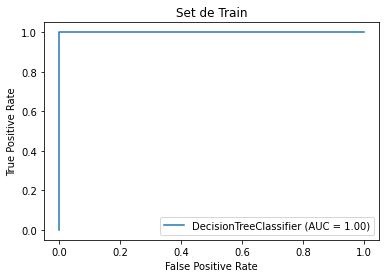

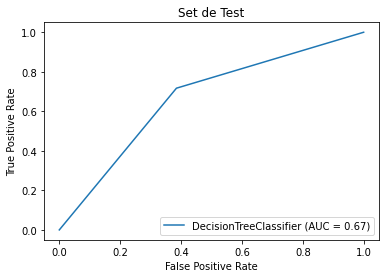

In [67]:
from sklearn.metrics import plot_roc_curve # Visualmente, vemos como el modelo esta overfitteando. En train, el AUC es de 1 y en en test desciende a 0.67

plot_roc_curve(clf, X_train, y_train)  
plt.title('Set de Train')

plot_roc_curve(clf, X_test, y_test)  
plt.title('Set de Test')

In [68]:
clf.feature_importances_ 

array([0.00109518, 0.00323262, 0.00267688, ..., 0.21866656, 0.02758037,
       0.03714461])

In [69]:
X_train.columns

Index(['info_personal_comunidad_autonoma_Andalucía',
       'info_personal_comunidad_autonoma_Aragón',
       'info_personal_comunidad_autonoma_Asturias (Principado de)',
       'info_personal_comunidad_autonoma_Balears (Illes)',
       'info_personal_comunidad_autonoma_Canarias',
       'info_personal_comunidad_autonoma_Cantabria',
       'info_personal_comunidad_autonoma_Castilla y León',
       'info_personal_comunidad_autonoma_Castilla-La Mancha',
       'info_personal_comunidad_autonoma_Cataluña',
       'info_personal_comunidad_autonoma_Ceuta (Ciudad Autónoma de)',
       ...
       'info_personal_ingresos_hogar_De 601 a 900 &euro;',
       'info_personal_ingresos_hogar_De 901 a 1.200 &euro;',
       'info_personal_ingresos_hogar_Menos o igual a 300 &euro;',
       'info_personal_ingresos_hogar_Más de 6.000 &euro;',
       'info_personal_ingresos_hogar_No tienen ingresos de ningún tipo',
       'info_personal_nro_registro', 'info_personal_nro_encuesta',
       'info_personal_dura

In [70]:
pd.DataFrame(clf.feature_importances_, X_train.columns).sort_values(by=0, ascending = False) # Pedimos un data frame que nos indique que columnas (features) son las de mayor importancia para nuestro modelo

,0
info_personal_duracion_encuesta,0.218667
info_personal_nro_parejas_1 pareja,0.049295
info_personal_edad_persona_entrevistada,0.037145
info_personal_nro_registro,0.028469
info_personal_peso_persona_entrevistada,0.027580
...,...
info_personal_ocupacion_persona_ingresos_ppales_Asistentes administrativos y especializados,0.000000
info_personal_ocupacion_persona_ingresos_ppales_Auxiliares de enfermería,0.000000
info_personal_ocupacion_persona_ingresos_ppales_Ayudantes de cocina,0.000000
info_personal_ocupacion_persona_ingresos_ppales_Bomberos,0.000000


Las dos variables, con sentido, que mejor explican este modelo son el **el numero de parejas** y la **edad** de la persona encuestada.
Llamativamente, el **peso** resulta ser la tercer feature que mejor explicaria las predicciones de este modelo.

¿


In [71]:
#Vamos a hacer una grilla para el arbol de decision para ver si mejora.

param_grid_dt = {
    'criterion': ['gini','entropy'],
    'max_depth': [10, 20 , 40],
    'min_samples_leaf': [1,2]
}

dtree = DecisionTreeClassifier(random_state=0)

cv_dt = GridSearchCV(dtree, param_grid_dt, scoring='accuracy')
cv_dt.fit(X, y);

In [72]:
results_dt = cv_dt.cv_results_

df_dt = pd.DataFrame(results_dt)
#df.sort_values(by='rank_test_score').head()
df_dt[['param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score').head()

,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score,std_test_score,rank_test_score
6,entropy,10,1,0.649351,0.040392,1
7,entropy,10,2,0.647679,0.039178,2
8,entropy,20,1,0.624477,0.031545,3
10,entropy,40,1,0.621760,0.033469,4
11,entropy,40,2,0.618730,0.029893,5


In [73]:
cv_dt.best_params_
#Los mejores parametros son:
#'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1}

In [74]:
dtree_chosen = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=10, min_samples_leaf=1) # Nuevo modelo con los parametros seleccionados.

dtree_chosen.fit(X_train, y_train) # Entrenamos

y_train_pred_dt = dtree_chosen.predict(X_train) # Predecimos en train
y_test_pred_dt = dtree_chosen.predict(X_test) # Predecimos en test

Set Train                      precision    recall  f1-score   support

sufrio_violencia_no       0.80      0.84      0.82      3386
sufrio_violencia_si       0.86      0.83      0.85      4268

           accuracy                           0.83      7654
          macro avg       0.83      0.83      0.83      7654
       weighted avg       0.84      0.83      0.83      7654

Set Test                      precision    recall  f1-score   support

sufrio_violencia_no       0.66      0.68      0.67       847
sufrio_violencia_si       0.74      0.73      0.73      1067

           accuracy                           0.70      1914
          macro avg       0.70      0.70      0.70      1914
       weighted avg       0.71      0.70      0.71      1914



Text(0.5, 1.0, 'Set de test')

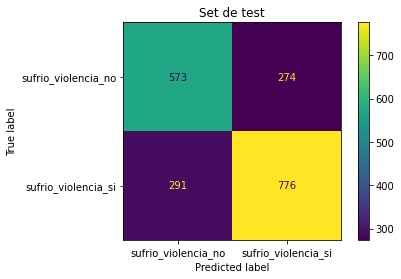

In [75]:
# Metricas de clasificacion y matriz de confusion

print('Set Train', classification_report(y_train, y_train_pred_dt, target_names=labels))
print('Set Test',classification_report(y_test, y_test_pred_dt, target_names=labels))

plot_confusion_matrix(dtree_chosen, X_test ,y_test, display_labels=labels,  values_format = '.0f')
plt.title("Set de test")

El accuracy descendio a 0.83 en train y ascendio a 0.70 en test. Mejoro con respecto al arbol default.

Text(0.5, 1.0, 'Set de Test')

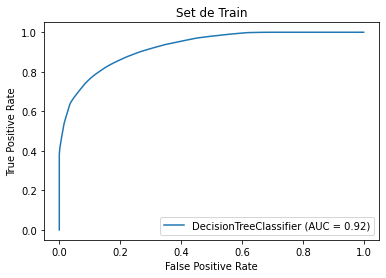

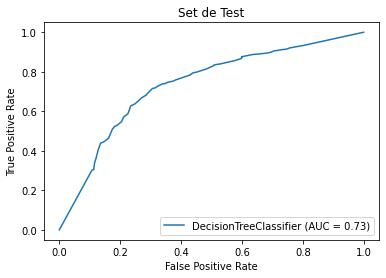

In [76]:
plot_roc_curve(dtree_chosen, X_train, y_train)  
plt.title('Set de Train')

plot_roc_curve(dtree_chosen, X_test, y_test)  
plt.title('Set de Test')

Las curvas ROC nos muestran un AUC de 0.92 para train y de 0.73 para test. Si bien el valor de trian es alto, el de test es comparativamente bajo. Por lo que el arbol tiende a 'aprenderse' demasiado bien los datos de entrenamiento y nos devuelve una prediccion con los datos de test bastante pobre. 
El modelo de regresion logistica da mejores resutados, ya que es mas homogeneo, con valores de AUC de 0.87 para train y 0.82 para test. Es decir, predice mejor y no se 'aprende' tan de memoria los datos de train. Esto tal vez tenga que ver con que busca probabilidades y no clasifica de forma tan cerrada como el arbol. Y precisamente, lo que buscamos en nuestras predicciones son probabilidades de pertenecer o no a un grupo de personas propenso a encontrarse con comportamientos violentos de una pareja. 

[Text(154.6467277837259, 207.55636363636364, 'X[1008] <= 0.024\nentropy = 0.99\nsamples = 7654\nvalue = [3386, 4268]'),
 Text(76.92849973233405, 187.7890909090909, 'X[1008] <= 0.017\nentropy = 0.843\nsamples = 2294\nvalue = [1672, 622]'),
 Text(43.86632762312634, 168.0218181818182, 'X[822] <= 0.5\nentropy = 0.668\nsamples = 1164\nvalue = [961, 203]'),
 Text(22.381236616702356, 148.25454545454545, 'X[1009] <= 0.181\nentropy = 0.829\nsamples = 440\nvalue = [325, 115]'),
 Text(10.574518201284796, 128.48727272727274, 'X[121] <= 0.5\nentropy = 0.953\nsamples = 177\nvalue = [111, 66]'),
 Text(5.914561027837259, 108.72, 'X[226] <= 0.5\nentropy = 0.973\nsamples = 47\nvalue = [19, 28]'),
 Text(3.9430406852248394, 88.95272727272729, 'X[1007] <= 0.632\nentropy = 0.994\nsamples = 33\nvalue = [18, 15]'),
 Text(2.150749464668094, 69.18545454545455, 'X[839] <= 0.5\nentropy = 0.75\nsamples = 14\nvalue = [3, 11]'),
 Text(1.433832976445396, 49.418181818181836, 'X[270] <= 0.5\nentropy = 0.414\nsamples = 

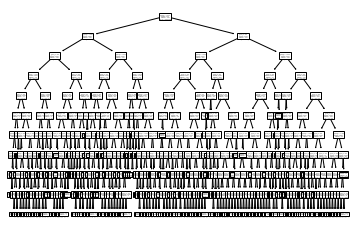

In [77]:
from sklearn import tree
tree.plot_tree(dtree_chosen)

In [78]:
dtree_chosen.get_depth()

10

##PERCEPTRON

In [54]:
from sklearn.linear_model import Perceptron

per = Perceptron(random_state=0)
per.fit(X_train, y_train)
y_train_pred = per.predict(X_train)
y_test_pred = per.predict(X_test)

Text(0.5, 1.0, 'Set de test')

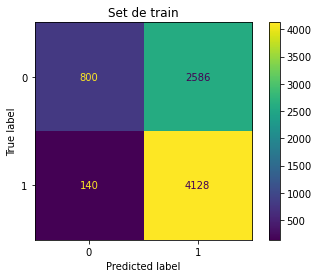

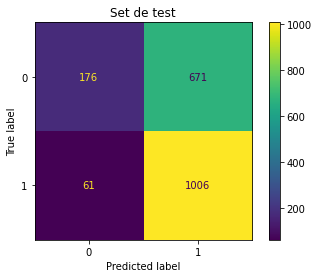

In [55]:
# Obtenemos la matriz de confusion para train y para test. 

confusion_matrix(y_train, y_train_pred)

plot_confusion_matrix(per, X_train, y_train, values_format = '.0f')
plt.title("Set de train")

confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(per, X_test, y_test, values_format = '.0f')
plt.title("Set de test")

In [56]:
# Armamos las metricas en un reporte de clasificacion 

labels = ['sufrio_violencia_no','sufrio_violencia_si']

print('Set Train', classification_report(y_train, y_train_pred, target_names=labels))
print('Set Test', classification_report(y_test, y_test_pred, target_names=labels))

Set Train                      precision    recall  f1-score   support

sufrio_violencia_no       0.85      0.24      0.37      3386
sufrio_violencia_si       0.61      0.97      0.75      4268

           accuracy                           0.64      7654
          macro avg       0.73      0.60      0.56      7654
       weighted avg       0.72      0.64      0.58      7654

Set Test                      precision    recall  f1-score   support

sufrio_violencia_no       0.74      0.21      0.32       847
sufrio_violencia_si       0.60      0.94      0.73      1067

           accuracy                           0.62      1914
          macro avg       0.67      0.58      0.53      1914
       weighted avg       0.66      0.62      0.55      1914



El accuracy es muy bajo: 0.64 para train y 0.62 para test. 
Los valores de f1-score tambien son los mas bajos en comparacion con los modelos anteriores: 0.37 y 0.75 para train y 0.32 y 0.73 para test. 

In [57]:
roc_auc_score_train = roc_auc_score(y_train, y_train_pred)
roc_auc_score_test = roc_auc_score(y_test, y_test_pred)

print(f'Métrica roc_auc_score en Train: {roc_auc_score_train}')
print(f'Métrica roc_auc_score en Test: {roc_auc_score_test}')

Métrica roc_auc_score en Train: 0.6017323661961071
Métrica roc_auc_score en Test: 0.5753112866514929


Text(0.5, 1.0, 'Set de Test')

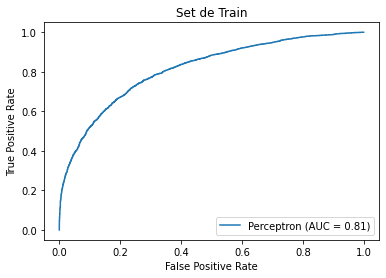

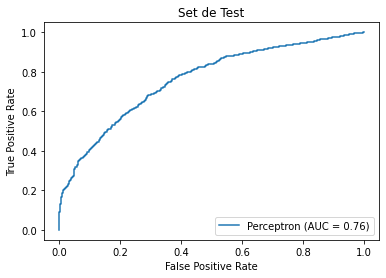

In [58]:
plot_roc_curve(per, X_train, y_train)  # Nose porque me siguen sin coincidir los valores.... ??
plt.title('Set de Train')

plot_roc_curve(per, X_test, y_test)  
plt.title('Set de Test')